Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


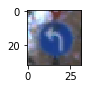

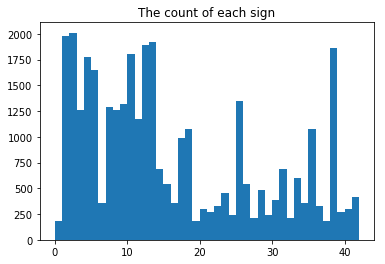

In [334]:
# Load pickled data
import pickle
import numpy as np
import pandas as pd
import random
import tensorflow as tf

#generate validate set
# from sklearn.model_selection import train_test_split  20%

# TODO: Fill this in based on where you saved the training and testing data

training_file = "../train.p"
validation_file = "../valid.p"
testing_file = "../test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

### Replace each question mark with the appropriate value.
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)


### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)

plt.figure(2)
plt.hist(y_train, bins=np.arange(y_train.min(), y_train.max()+1))
plt.title('The count of each sign')
#X_train

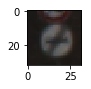

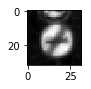

In [335]:
import cv2
from numpy import zeros, newaxis
def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    (assuming your grayscaled image is called 'gray')
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

def rgb2gray(input):
    x_train = []
    for i in range(len(input)):
        gray = grayscale(input[i])
        gray = gray.astype(float)
        gray /= (gray.max()/255.0)
        x_train.append(gray[:,:,newaxis])
    input = x_train
    input = np.asarray(input)
    return input

plt.figure(figsize=(1,1))
plt.imshow(X_train[0].squeeze())
X_train = rgb2gray(X_train)
X_valid = rgb2gray(X_valid)
X_test = rgb2gray(X_test)
plt.figure(2)
plt.figure(figsize=(1,1))
plt.imshow(X_train[0].squeeze(),cmap = "gray")
#len(X_train)
#X_train
#X_train[0].shape

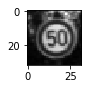

In [256]:
plt.figure(figsize=(1,1))
plt.imshow(X_train[0].squeeze(),cmap = "gray")

In [252]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

In [253]:
import tensorflow as tf

EPOCHS = 50
BATCH_SIZE = 128

from tensorflow.contrib.layers import flatten


def LeNet(x):
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1

    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean=mu, stddev=sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean=mu, stddev=sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0 = flatten(conv2)

    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean=mu, stddev=sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1 = tf.matmul(fc0, fc1_W) + fc1_b

    # SOLUTION: Activation.
    fc1 = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W = tf.Variable(tf.truncated_normal(shape=(120, 84), mean=mu, stddev=sigma))
    fc2_b = tf.Variable(tf.zeros(84))
    fc2 = tf.matmul(fc1, fc2_W) + fc2_b

    # SOLUTION: Activation.
    fc2 = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W = tf.Variable(tf.truncated_normal(shape=(84, 43), mean=mu, stddev=sigma))
    fc3_b = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b

    return logits


x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)


rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels = one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)


correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


In [254]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)

    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})

        validation_accuracy = evaluate(X_valid, y_valid)
        training_accuracy = evaluate(X_train,y_train)
        print("EPOCH {} ...".format(i + 1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print()

    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.737
Training Accuracy = 0.824

EPOCH 2 ...
Validation Accuracy = 0.828
Training Accuracy = 0.925

EPOCH 3 ...
Validation Accuracy = 0.845
Training Accuracy = 0.949

EPOCH 4 ...
Validation Accuracy = 0.880
Training Accuracy = 0.970

EPOCH 5 ...
Validation Accuracy = 0.880
Training Accuracy = 0.966

EPOCH 6 ...
Validation Accuracy = 0.885
Training Accuracy = 0.984

EPOCH 7 ...
Validation Accuracy = 0.888
Training Accuracy = 0.981

EPOCH 8 ...
Validation Accuracy = 0.902
Training Accuracy = 0.992

EPOCH 9 ...
Validation Accuracy = 0.880
Training Accuracy = 0.983

EPOCH 10 ...
Validation Accuracy = 0.885
Training Accuracy = 0.990

EPOCH 11 ...
Validation Accuracy = 0.889
Training Accuracy = 0.989

EPOCH 12 ...
Validation Accuracy = 0.885
Training Accuracy = 0.987

EPOCH 13 ...
Validation Accuracy = 0.913
Training Accuracy = 0.995

EPOCH 14 ...
Validation Accuracy = 0.899
Training Accuracy = 0.985

EPOCH 15 ...
Validation Accuracy = 0.901
Tra

In [255]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.919


7170 7170


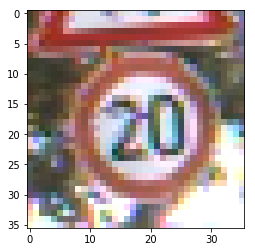

In [132]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
import matplotlib.pyplot as plt
import csv

# function for reading the images
# arguments: path to the traffic sign data, for example './GTSRB/Training'
# returns: list of images, list of corresponding labels 
def readTrafficSigns(rootpath):
    '''Reads traffic sign data for German Traffic Sign Recognition Benchmark.

    Arguments: path to the traffic sign data, for example './GTSRB/Training'
    Returns:   list of images, list of corresponding labels'''
    images = [] # images
    labels = [] # corresponding labels
    # loop over all 42 classes
    for c in [0,1,3,5,9]:
        prefix = rootpath + '/' + format(c, '05d') + '/' # subdirectory for class
        gtFile = open(prefix + 'GT-'+ format(c, '05d') + '.csv') # annotations file
        gtReader = csv.reader(gtFile, delimiter=';') # csv parser for annotations file
        next(gtReader) # skip header
        # loop over all images in current annotations file
        for row in gtReader:
            images.append(plt.imread(prefix + row[0])) # the 1th column is the filename
            labels.append(row[7]) # the 8th column is the label
        gtFile.close()
    return images, labels

trainImages, trainLabels = readTrafficSigns('../GTSRB/Final_Training/Images/')


7170 7170


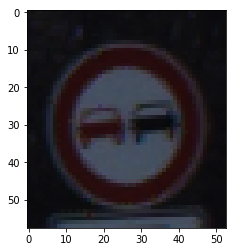

'3'

In [213]:
print(len(trainLabels), len(trainImages))
plt.imshow(trainImages[6442])
plt.show()
trainLabels[2488]

In [139]:
trainImages[1442].shape

(44, 44, 3)

In [288]:
X_test = [trainImages[42], trainImages[1442], trainImages[2481],trainImages[4242],trainImages[6442]]
X_test[2].shape

(42, 43, 3)

In [290]:
X_test = [trainImages[42], trainImages[1442], trainImages[2481],trainImages[4242],trainImages[6442]]
y_test = [trainLabels[42], trainLabels[1442], trainLabels[2481],trainLabels[4242],trainLabels[6442]]

def trimImage(input):
    output = []
    for i in range(len(input)):
        im = input[i]
        width, height, layers = im.shape   # Get dimensions
        left = (width - 32)/2
        top = (height - 32)/2
        if width%2 != 0:
            im = im[0:(width-1)]
        if height%2 != 0:
            im = im[:,0:(height-1)]
        im = im[left:-left:,top:-top:]
        output.append(im)
        #im.shape
        #plt.imshow(im)
        #plt.show
    return output

X_test = trimImage(X_test)
#X_train[0].shape
X_test = rgb2gray(X_test)
#X_train[0].shape


/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/__main__.py:15: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


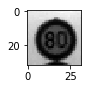

In [294]:
plt.figure(figsize=(1,1))
plt.imshow(X_test[3].squeeze(),cmap = "gray")

In [317]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    y_predicted = sess.run(y,feed_dict={x:X_test,y:y_test})
    print(y_predicted)


[0 1 3 5 9]


In [306]:
y_test[0]

'0'

In [310]:
y_predicted[0]

0

In [315]:
correct = 0
for i in range(len(y_test)):
    if(int(y_test[i]) == y_predicted[i]):
        correct+=1

performance = correct/len(y_test)
print("Accuracy is ", performance)

Accuracy is  1.0


In [318]:
logits

<tf.Tensor 'add_84:0' shape=(?, 43) dtype=float32>

In [326]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    y = tf.nn.softmax(logits,name = None)
    feed_dict = {x:X_test}
    classification = sess.run(y,feed_dict)
    #print(classification)
    top_class = sess.run(tf.nn.top_k(tf.constant(classification), k=5))
    print(top_class)
    #probabilities = sess.run(tf.nn.top_k(prob_val, k=5))
    #print(prob_val)

TopKV2(values=array([[  1.00000000e+00,   2.58607523e-16,   1.94066472e-34,
          1.27080195e-35,   6.59985120e-37],
       [  1.00000000e+00,   2.09694176e-12,   2.51084264e-18,
          2.04613423e-18,   9.47172789e-20],
       [  9.99995112e-01,   2.67881887e-06,   2.10305029e-06,
          1.36162996e-07,   5.56156177e-10],
       [  9.99998689e-01,   1.36981237e-06,   1.23684156e-08,
          4.99148500e-11,   6.93371853e-15],
       [  9.06708717e-01,   9.32796299e-02,   1.16912070e-05,
          1.70834777e-08,   3.50779961e-10]], dtype=float32), indices=array([[ 0,  1, 28,  4,  6],
       [ 1,  6,  5,  2,  0],
       [ 2,  6,  3,  1,  5],
       [ 5,  1,  2,  6,  8],
       [17, 35, 11, 12, 13]], dtype=int32))


In [331]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : X_test})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
            
mu = 0
sigma = 0.1

# SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean=mu, stddev=sigma))
conv1_b = tf.Variable(tf.zeros(6))
conv1 = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

# SOLUTION: Activation.
conv1 = tf.nn.relu(conv1)

# SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

# SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean=mu, stddev=sigma))
conv2_b = tf.Variable(tf.zeros(16))
conv2 = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

# SOLUTION: Activation.
conv2 = tf.nn.relu(conv2)

# SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

# SOLUTION: Flatten. Input = 5x5x16. Output = 400.
fc0 = flatten(conv2)

# SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean=mu, stddev=sigma))
fc1_b = tf.Variable(tf.zeros(120))
fc1 = tf.matmul(fc0, fc1_W) + fc1_b

# SOLUTION: Activation.
fc1 = tf.nn.relu(fc1)

# SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
fc2_W = tf.Variable(tf.truncated_normal(shape=(120, 84), mean=mu, stddev=sigma))
fc2_b = tf.Variable(tf.zeros(84))
fc2 = tf.matmul(fc1, fc2_W) + fc2_b

# SOLUTION: Activation.
fc2 = tf.nn.relu(fc2)

# SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
fc3_W = tf.Variable(tf.truncated_normal(shape=(84, 43), mean=mu, stddev=sigma))
fc3_b = tf.Variable(tf.zeros(43))
logits = tf.matmul(fc2, fc3_W) + fc3_b

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    outputFeatureMap(X_test[0],conv1)

FailedPreconditionError: Attempting to use uninitialized value Variable_200
	 [[Node: Variable_200/read = Identity[T=DT_FLOAT, _class=["loc:@Variable_200"], _device="/job:localhost/replica:0/task:0/gpu:0"](Variable_200)]]
	 [[Node: MaxPool_40/_1091 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_7_MaxPool_40", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'Variable_200/read', defined at:
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/traitlets/config/application.py", line 653, in launch_instance
    app.start()
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-331-40ec78c32e6b>", line 34, in <module>
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean=mu, stddev=sigma))
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/ops/variables.py", line 224, in __init__
    expected_shape=expected_shape)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/ops/variables.py", line 370, in _init_from_args
    self._snapshot = array_ops.identity(self._variable, name="read")
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/ops/gen_array_ops.py", line 1424, in identity
    result = _op_def_lib.apply_op("Identity", input=input, name=name)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 759, in apply_op
    op_def=op_def)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2240, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1128, in __init__
    self._traceback = _extract_stack()

FailedPreconditionError (see above for traceback): Attempting to use uninitialized value Variable_200
	 [[Node: Variable_200/read = Identity[T=DT_FLOAT, _class=["loc:@Variable_200"], _device="/job:localhost/replica:0/task:0/gpu:0"](Variable_200)]]
	 [[Node: MaxPool_40/_1091 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_7_MaxPool_40", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


In [332]:
X_test[0]

array([[[ 128.],
        [  84.],
        [  82.],
        ..., 
        [  86.],
        [  90.],
        [  89.]],

       [[ 111.],
        [  94.],
        [  79.],
        ..., 
        [  84.],
        [  87.],
        [ 114.]],

       [[  95.],
        [  74.],
        [  80.],
        ..., 
        [ 132.],
        [ 137.],
        [ 141.]],

       ..., 
       [[ 124.],
        [  92.],
        [ 181.],
        ..., 
        [ 255.],
        [ 255.],
        [ 255.]],

       [[ 125.],
        [ 103.],
        [ 104.],
        ..., 
        [ 255.],
        [ 255.],
        [ 255.]],

       [[ 124.],
        [ 109.],
        [  88.],
        ..., 
        [ 255.],
        [ 255.],
        [ 255.]]])